## t-SNE (t-distributed Stochastic Neighbor Embedding)

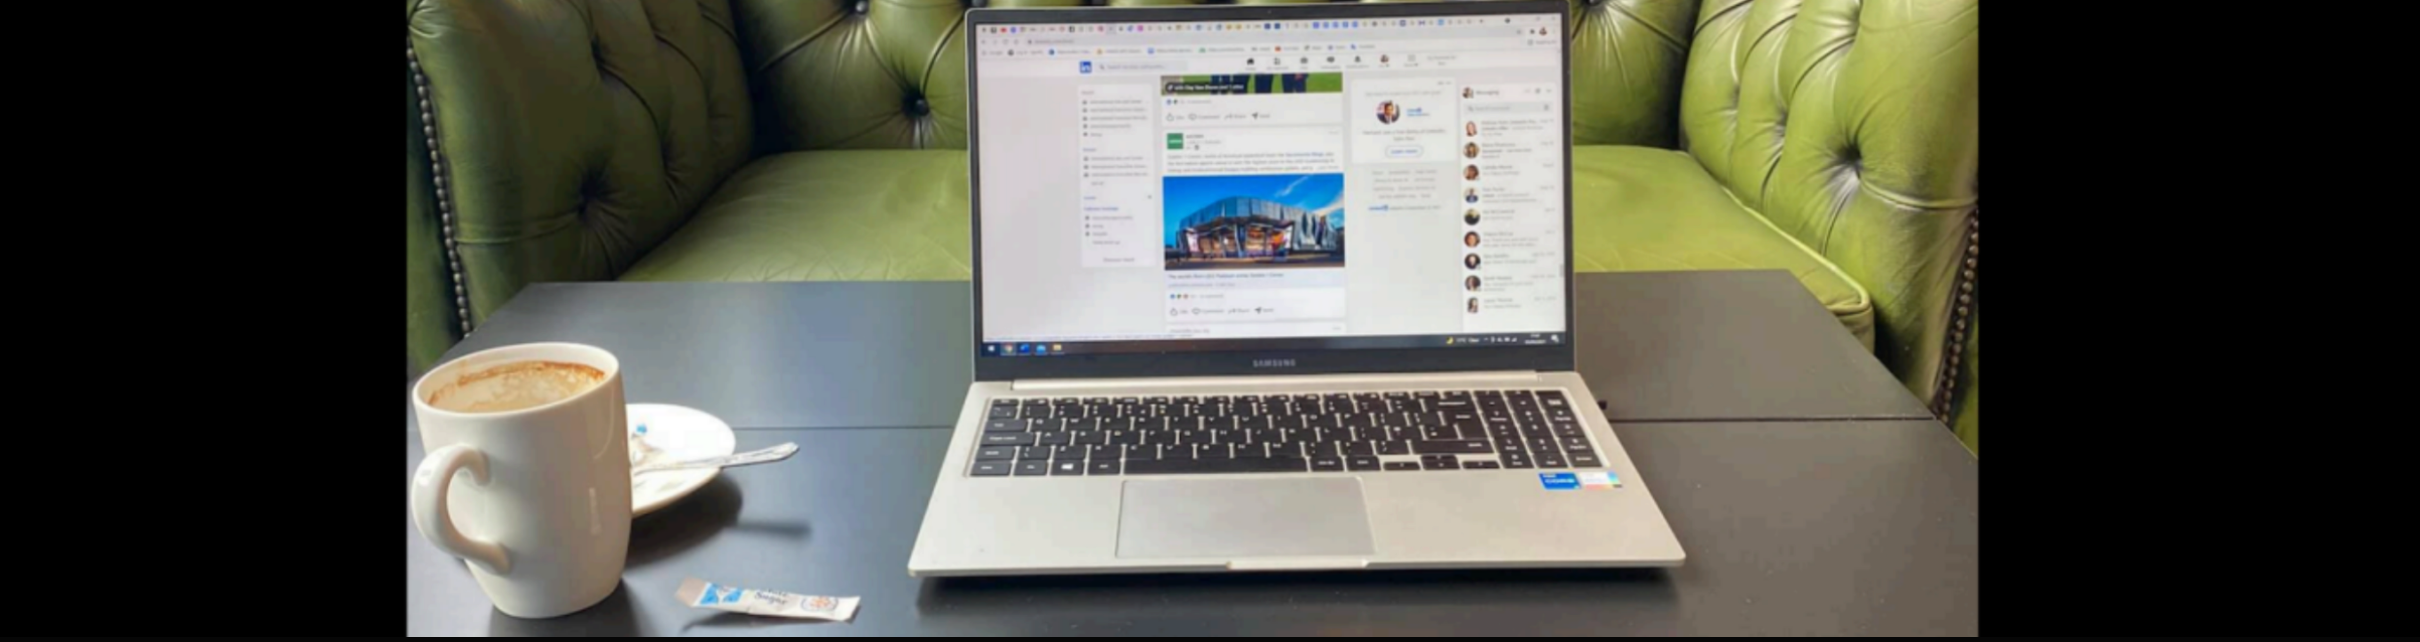

#### Hemant Thapa

t-SNE, which stands for t-distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique used for visualising and exploring high-dimensional data.

Dimensionality Reduction: t-SNE is primarily used for reducing the dimensionality of high-dimensional data while preserving the relationships between data points. High-dimensional data can be difficult to visualize and analyze, especially when there are many features or dimensions. t-SNE reduces the data to a lower-dimensional space (usually 2D or 3D) so that it can be easily visualized and interpreted.

- Stochastic Neighbor Embedding: t-SNE is based on the concept of embedding data points into a lower-dimensional space in such a way that similar data points in the high-dimensional space remain close together in the lower-dimensional space. It does this by modeling pairwise similarities between data points.

- Probability Distributions: t-SNE uses probability distributions to capture the similarity between data points in both the high-dimensional and lower-dimensional spaces. It constructs a probability distribution over pairs of high-dimensional data points, where similar points have higher probabilities of being chosen.

- Cost Function: The algorithm aims to minimize a cost function that measures the mismatch between the pairwise similarities in the high-dimensional space and the lower-dimensional space. It uses gradient descent optimization to iteratively adjust the positions of data points in the lower-dimensional space to minimize this cost function.

- Heavy-Tailed t-Distribution: t-SNE uses a heavy-tailed Student's t-distribution to model the pairwise similarities in the lower-dimensional space. This distribution has heavier tails compared to a Gaussian distribution, which makes it less sensitive to outliers and better at preserving the distances between clusters of data points.

- Perplexity: Perplexity is a hyperparameter in t-SNE that controls the balance between preserving global and local structure in the data. It roughly corresponds to the number of nearest neighbors that should be considered when computing similarities. Adjusting perplexity can impact the visualization results.

- Local Structure vs. Global Structure: t-SNE is effective at revealing both local and global structures in the data. Local structure refers to the relationships between nearby data points, while global structure refers to the relationships between distant data points. By adjusting perplexity, you can control the focus on local or global structure.

- Random Initialisation: t-SNE often starts with a random initialization of data points in the lower-dimensional space. The optimization process seeks to find an arrangement of points that minimizes the cost function.

- Nonlinear Transformation: t-SNE is inherently a nonlinear technique. It can capture complex relationships and clusters in the data, making it useful for exploring intricate patterns.

#### Loading Libraries

In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from numpy.linalg import eig
from sklearn import datasets
from sklearn.manifold import TSNE
from tensorflow import keras
from matplotlib.colors import ListedColormap
from matplotlib.ticker import ScalarFormatter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

- Dimensions (n_components=2):

Most common choice for visualization purposes.
Allows you to plot the data on a standard 2D scatter plot.
Ideal for observing clusters or patterns in the data.
Easier to interpret and plot, especially for large datasets.

- Dimensions (n_components=3):

Useful if you believe the data contains more complex structures that might not be captured well in 2D.
Can provide a deeper insight, revealing patterns that may not be visible in 2D.
Requires 3D plotting, which can be less intuitive to interpret and might require interactive 3D visualization tools for thorough exploration.
Can be more computationally intensive.

#### Loading Dataset

In [3]:
#loading the Iris dataset
iris = datasets.load_iris()

#### Feature Engineering 

In [4]:
#feature and target selection 
X = iris.data
y = iris.target

In [5]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

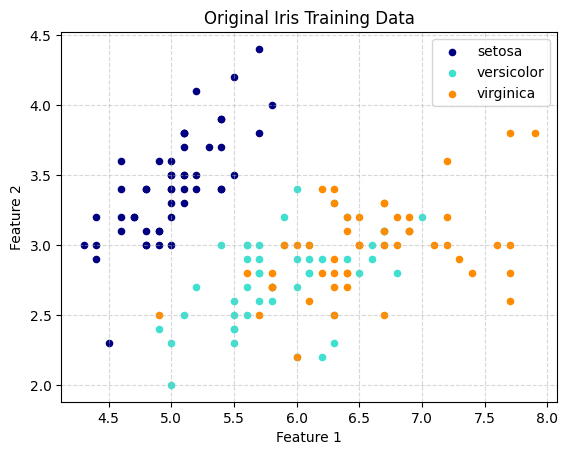

In [6]:
#original scatter plot of dataset or plot after before tSNE transformation 
colors = ['navy', 'turquoise', 'darkorange']
for i, color in zip(range(len(np.unique(y))), colors):
    subset = X[y == i]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[i], color=color, s=20)
plt.title("Original Iris Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
plt.show()

In [7]:
#creating a t-SNE (t-distributed Stochastic Neighbor Embedding) object with specified parameters
tsne = TSNE(n_components=3, random_state=0, perplexity=10, learning_rate=10, n_iter=1000)

#### t-SNE Parameter Guidelines

`t-SNE (t-Distributed Stochastic Neighbor Embedding)` is a powerful technique for dimensionality reduction and is particularly well suited for the visualisation of high-dimensional datasets. 

Here's a guide to its key parameters:

- **n_components**: Number of dimensions in which to embed the data.
  - *Optimal Range*: Typically 2 (for 2D visualization) or 3 (for 3D visualisation).
- **random_state**: Seed for the random number generator to ensure reproducibility.
  - *Suggested Value*: Any integer, where the same value ensures reproducibility.
- **perplexity**: Balances attention between local and global aspects of your data.
  - *Optimal Range*: Usually between 5 and 50. 
  - *Note*: Depends heavily on the dataset size and structure.
- **learning_rate**: Controls the step size in the space during optimization.
  - *Optimal Range*: Usually between 10 and 1000.
  - *Note*: Very low values might lead to sub-optimal solutions.
- **n_iter**: Number of iterations for optimization.
  - *Optimal Range*: At least 1000; more for larger or more complex datasets.


In [8]:
#transforming
X_tsne = tsne.fit_transform(X)

In [9]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=0)

In [10]:
print(tsne)

TSNE(learning_rate=10, n_components=3, perplexity=10, random_state=0)



In your t-SNE transformation, specified n_components=3, which means t-SNE reduced the original 4 features (sepal length, sepal width, petal length, and petal width) down to 3 dimensions. Therefore, one of the original features (petal width) is not explicitly represented in the t-SNE results.

The t-SNE algorithm aims to project high-dimensional data into a lower-dimensional space while preserving the relationships and similarities between data points as much as possible. In this case, it chose to represent the data in a 3-dimensional space, effectively reducing the dimensionality of the original dataset.

Each data point in the t-SNE space now has three coordinates (Dimension 1, Dimension 2, and Dimension 3) that capture the relationships between the original features. The fourth feature (petal width) is not explicitly present in the t-SNE dimensions, but its information is indirectly incorporated into the lower-dimensional representation based on how it relates to the other features.

In [11]:
#checking shape of feature
X_train.shape, X_test.shape

((120, 3), (30, 3))

In [12]:
#checking shape of target
y_train.shape, y_test.shape

((120,), (30,))

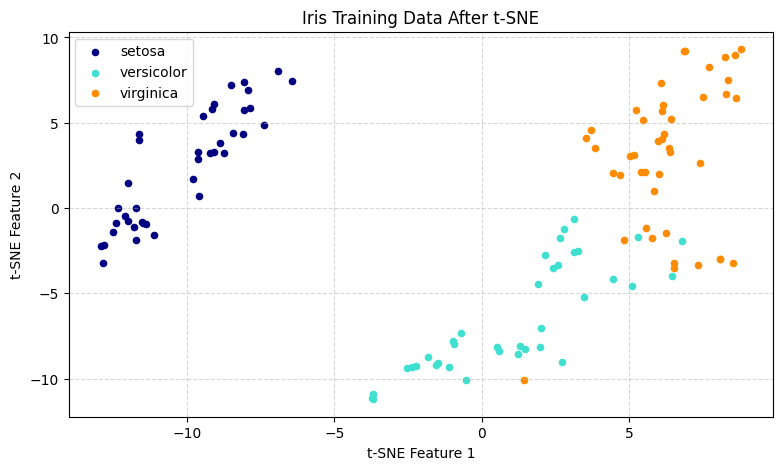

In [13]:
#scatter plot of dataset after tSNE transformation 
plt.figure(figsize=(20, 5))
colors = ['navy', 'turquoise', 'darkorange']
plt.subplot(1, 2, 2)
for i, color in zip(range(len(np.unique(y_train))), colors):
    subset = X_train[y_train == i]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[i], color=color, s=20)
plt.title("Iris Training Data After t-SNE")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

#### k-Nearest Neighbour 

In [14]:
#grid parameters for search
param_grid = {'n_neighbors': [x for x in range(1, 10)]}

In [15]:
param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [16]:
#fitting grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [17]:
#printing fitted parameters
print(grid_search.fit(X_train, y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')


In [18]:
#performing grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

In [19]:
#best grid search result
best_knn_model

KNeighborsClassifier(n_neighbors=8)

In [20]:
#using best gird search parameter for model 
knn_model = grid_search.best_estimator_

In [21]:
#making predictions
y_pred = knn_model.predict(X_test)
y_pred[:5]

array([2, 1, 0, 2, 0])

#### Model Evaluation 

In [22]:
#accrucay and classificaiton report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:
print("Best KNN Model:", best_knn_model)
print("Accuracy:", accuracy)

Best KNN Model: KNeighborsClassifier(n_neighbors=8)
Accuracy: 1.0


In [24]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
def decision_boundary(X, y, features, model):
    #mesh grid 
    n_points = 100
    x1_min, x1_max = X[:, features[0]].min() - 1, X[:, features[0]].max() + 1
    x2_min, x2_max = X[:, features[1]].min() - 1, X[:, features[1]].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    #third feature with constant value (0)
    xx3 = np.zeros_like(xx1.ravel())
    xx = np.column_stack((xx1.ravel(), xx2.ravel(), xx3))
    #predict using your model
    predictions = model.predict(xx)
    #reshape the predictions to match the contour plot dimensions
    predictions = predictions.reshape(xx1.shape)
    #contour plot
    plt.figure(figsize=(6, 4))
    plt.contourf(xx1, xx2, predictions, cmap=plt.cm.RdYlBu, alpha=0.5)
    #scatter plot of original features
    plt.scatter(X[:, features[0]], X[:, features[1]], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.xlabel(f'Feature {features[0]+1}')
    plt.ylabel(f'Feature {features[1]+1}')
    plt.title(f'KNN Decision Boundary for Features {features[0]+1} and {features[1]+1}', fontsize=10)
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.show()

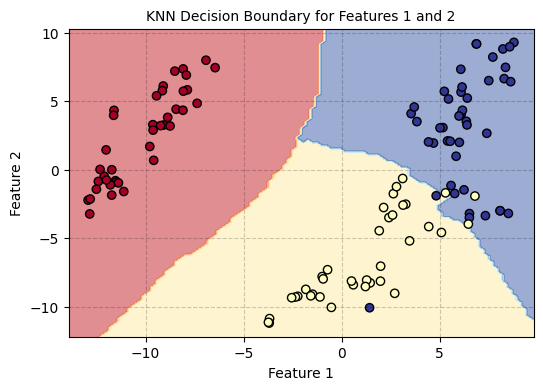

In [26]:
decision_boundary(X_train, y_train, [0, 1], knn_model)

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [28]:
#number of classes
num_classes = conf_matrix.shape[0]

class_TP = {}
class_TN = {}
class_FP = {}
class_FN = {}

#TP, TN, FP, and FN for each class
for i in range(num_classes):
    #True Positives (TP) for class i
    TP = conf_matrix[i, i]
    #True Negatives (TN) for class i
    #Sum of all values in the matrix except the current row and column
    TN = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    #False Positives (FP) for class i
    FP = np.sum(conf_matrix[:, i]) - TP
    #False Negatives (FN) for class i
    FN = np.sum(conf_matrix[i, :]) - TP
    #Store the results in dictionaries with class labels as keys
    class_TP[i] = TP
    class_TN[i] = TN
    class_FP[i] = FP
    class_FN[i] = FN

In [29]:
for i in range(num_classes):
    print(f"Class {i} - True Positives (TP): {class_TP[i]}, True Negatives (TN): {class_TN[i]}, False Positives (FP): {class_FP[i]}, False Negatives (FN): {class_FN[i]}")

Class 0 - True Positives (TP): 11, True Negatives (TN): 19, False Positives (FP): 0, False Negatives (FN): 0
Class 1 - True Positives (TP): 13, True Negatives (TN): 17, False Positives (FP): 0, False Negatives (FN): 0
Class 2 - True Positives (TP): 6, True Negatives (TN): 24, False Positives (FP): 0, False Negatives (FN): 0


#### Deep Learning Model

#### t-SNE transformation

In [30]:
#tsne transformation
tsne = TSNE(n_components=2, random_state=0, perplexity=10, learning_rate=10, n_iter=1000)
X_tsne = tsne.fit_transform(X)

In [31]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=0)

In [32]:
#building deep learning model
def deep_learning_model(X_train, y_train, X_test, y_test, features_input):
    model = keras.Sequential([
        #input layer for 2 t-SNE features
        keras.layers.Dense(64, activation='relu', input_shape=(features_input,)),
        keras.layers.Dense(32, activation='relu'),
        #output layer with 3 units for 3 classes
        keras.layers.Dense(3, activation='softmax')  
    ])

    model.compile(optimizer='adam',
                  #multiclass classification
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #epochs 200 and batch size 32 
    history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    return model, history, loss, accuracy, val_loss, val_accuracy


In [33]:
#trianing model
model, history, loss, accuracy, val_loss, val_accuracy = deep_learning_model(X_train, y_train, X_test, y_test, 2)

#### Model Evaluation 

In [34]:
#accuracy 
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 22ms/step - loss: 0.0217 - accuracy: 1.0000
Test accuracy: 100.00%


In [35]:
#function for loss and accuracy 
def loss_and_accuracy_plot():
    plt.figure(figsize=(12, 4))
    #training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.legend()
    plt.title('Loss vs. Epoch')
    
    #plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epoch')
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.tight_layout()
    plt.show()

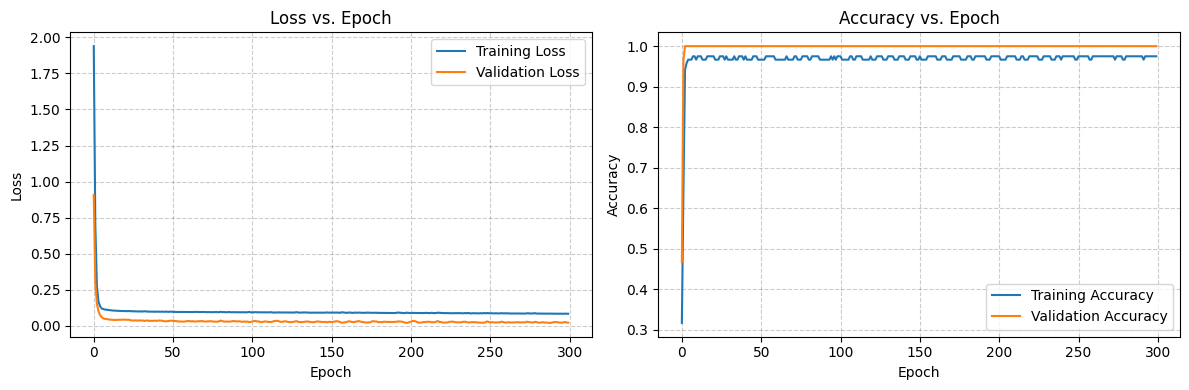

In [36]:
loss_and_accuracy_plot()

In [37]:
def decision_boundary(X, y, model):
    #mesh grid for plotting
    n_points = 100
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    xx = np.column_stack((xx1.ravel(), xx2.ravel()))
    #predict using your deep learning model
    predictions = model.predict(xx)
    predictions = np.argmax(predictions, axis=1)
    #reshape the predictions to match the contour plot dimensions
    predictions = predictions.reshape(xx1.shape)
    #colormap for the decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    #contour plot
    plt.figure(figsize=(6, 4))
    plt.contourf(xx1, xx2, predictions, cmap=cmap_light, alpha=0.5)
    #scatter plot of original features
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light, edgecolor='k', s=40)
    plt.xlabel("t-SNE Feature 1")
    plt.ylabel("t-SNE Feature 2")
    #legend for the scatter plot
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend)
    plt.title("Decision Boundary Plot using t-SNE Features with Deep Learning Model")
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.show()

313/313 [==============================] - 0s 855us/step


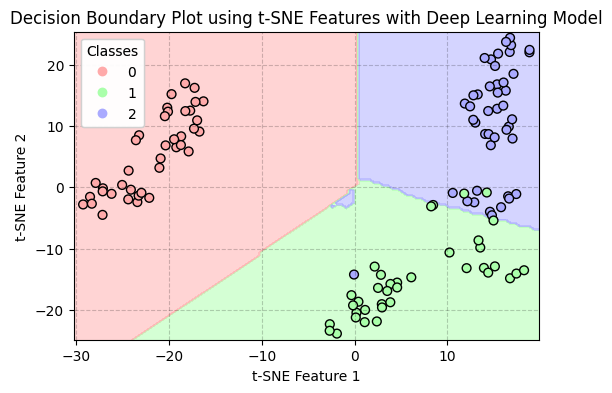

In [38]:
#decision boundary plot
decision_boundary(X_train, y_train, model)

313/313 [==============================] - 0s 943us/step


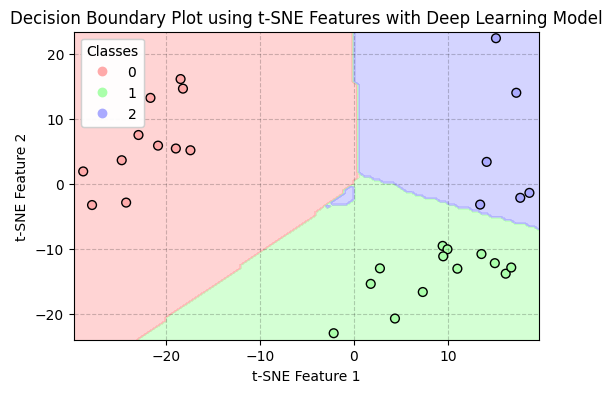

In [39]:
#decision boundary plot
decision_boundary(X_test, y_test, model)

In [40]:
#making predicitons
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 19ms/step


#### Truth Table 

In [41]:
confusion = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [42]:
#TP, TN, FP, FN for each class
TP = np.diag(confusion)
FP = confusion.sum(axis=0) - TP
FN = confusion.sum(axis=1) - TP
TN = confusion.sum() - (TP + FP + FN)

In [43]:
#total correct and incorrect predicted result
for i in range(len(TP)):
    print(f"Class {i} - True Positives: {TP[i]}, True Negatives: {TN[i]}, False Positives: {FP[i]}, False Negatives: {FN[i]}")

Class 0 - True Positives: 11, True Negatives: 19, False Positives: 0, False Negatives: 0
Class 1 - True Positives: 13, True Negatives: 17, False Positives: 0, False Negatives: 0
Class 2 - True Positives: 6, True Negatives: 24, False Positives: 0, False Negatives: 0


In [44]:
#classification report
class_report = classification_report(y_test, y_pred_classes)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(n_classes))

In [46]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

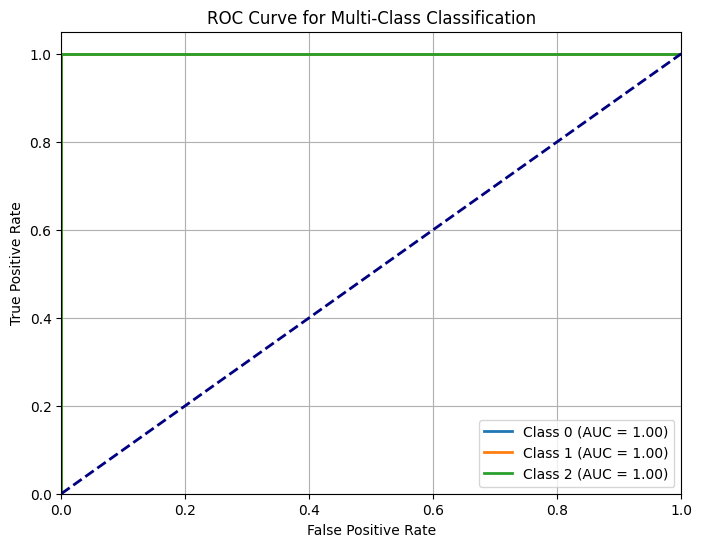

In [47]:
#roc curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### References

1. Scikit-Learn Documentation for t-SNE:
   - [https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

2. Scikit-Learn Documentation for t-SNE (Older Version):
   - [https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html](https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html)

3. "Introduction to t-SNE in Python with Scikit-Learn" by Daniel Mueller-Komorowska (January 5, 2021):
   - [https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/](https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/)
